In [ ]:
%load_ext autoreload
%autoreload 2

Processing file: ../data/dbt-3-csv/2014_10_03-00_54_40_ECG.csv
Original CSV file size: 100.19 MB
                         EcgWaveform
datetime                            
2014-10-03 00:54:40.430         1986
2014-10-03 00:54:40.434         1987
2014-10-03 00:54:40.438         1988
2014-10-03 00:54:40.442         1988
2014-10-03 00:54:40.446         1985
Saved to feather: ../data/feathers/EcgWaveform-3-3-00_54_40-0HG.feather (19.84 MB)
Visualizing data from: ../data/feathers/EcgWaveform-3-3-00_54_40-0HG.feather


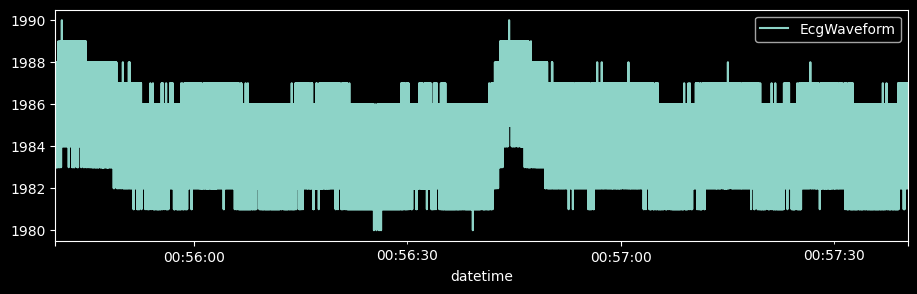

Processing file: ../data/dbt-3-csv/2014_10_01-06_00_57_ECG.csv
Original CSV file size: 402.67 MB
                         EcgWaveform
datetime                            
2014-10-01 06:00:57.428          297
2014-10-01 06:00:57.432          297
2014-10-01 06:00:57.436          297
2014-10-01 06:00:57.440          297
2014-10-01 06:00:57.444          297
Saved to feather: ../data/feathers/EcgWaveform-3-1-06_00_57-0HG.feather (89.60 MB)
Visualizing data from: ../data/feathers/EcgWaveform-3-1-06_00_57-0HG.feather


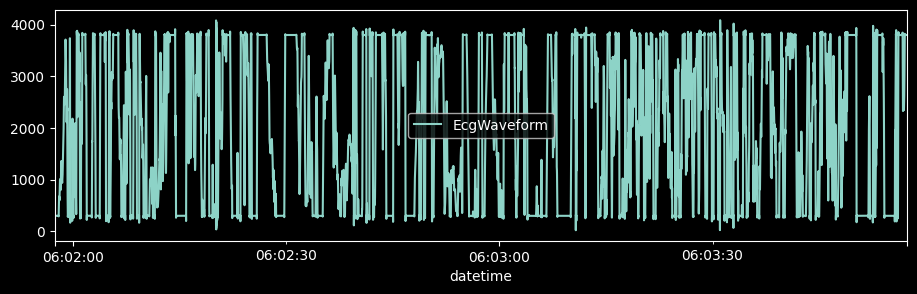

Processing file: ../data/dbt-3-csv/2014_10_04-05_33_24_ECG.csv
Original CSV file size: 242.19 MB
                         EcgWaveform
datetime                            
2014-10-04 05:33:24.433          297
2014-10-04 05:33:24.437          297
2014-10-04 05:33:24.441          297
2014-10-04 05:33:24.445          297
2014-10-04 05:33:24.449          297
Saved to feather: ../data/feathers/EcgWaveform-3-4-05_33_24-0HG.feather (54.37 MB)
Visualizing data from: ../data/feathers/EcgWaveform-3-4-05_33_24-0HG.feather


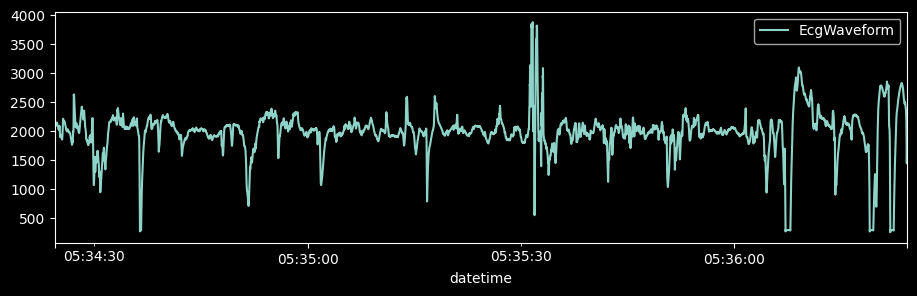

Processing file: ../data/dbt-3-csv/2014_10_03-18_06_15_ECG.csv
Original CSV file size: 85.22 MB
                         EcgWaveform
datetime                            
2014-10-03 18:06:15.432         3798
2014-10-03 18:06:15.436         3798
2014-10-03 18:06:15.440         3798
2014-10-03 18:06:15.444         3798
2014-10-03 18:06:15.448         3798
Saved to feather: ../data/feathers/EcgWaveform-3-3-18_06_15-0HG.feather (18.75 MB)
Visualizing data from: ../data/feathers/EcgWaveform-3-3-18_06_15-0HG.feather


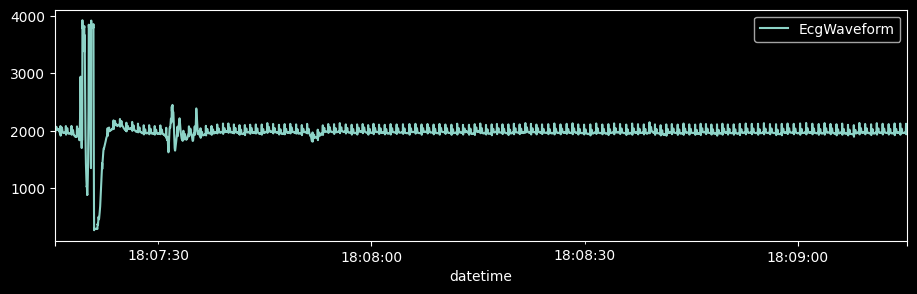

Processing file: ../data/dbt-3-csv/2014_10_02-09_24_32_ECG.csv
Original CSV file size: 385.85 MB
                         EcgWaveform
datetime                            
2014-10-02 09:24:32.430          297
2014-10-02 09:24:32.434          297
2014-10-02 09:24:32.438          297
2014-10-02 09:24:32.442          297
2014-10-02 09:24:32.446          297
Saved to feather: ../data/feathers/EcgWaveform-3-2-09_24_32-0HG.feather (80.69 MB)
Visualizing data from: ../data/feathers/EcgWaveform-3-2-09_24_32-0HG.feather


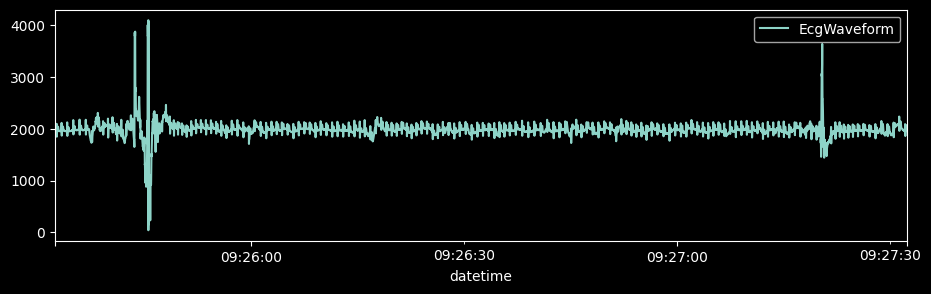

In [1]:
import pandas as pd


import pandas as pd
# suppress pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import os




import hypopredict.compressor as comp

ID = 3

SIGNAL_TYPE = "EcgWaveform"
RAW_DATA_DIR = '../data/feathers'




person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 4

Processing file: ../data/dbt-4-csv/2014_10_01-19_33_00_ECG.csv
Original CSV file size: 10.61 MB
                         EcgWaveform
datetime                            
2014-10-01 19:33:00.448          297
2014-10-01 19:33:00.452          297
2014-10-01 19:33:00.456          297
2014-10-01 19:33:00.460          297
2014-10-01 19:33:00.464          297
Saved to feather: ../data/feathers/EcgWaveform-4-1-19_33_00-1HG.feather (2.27 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-1-19_33_00-1HG.feather


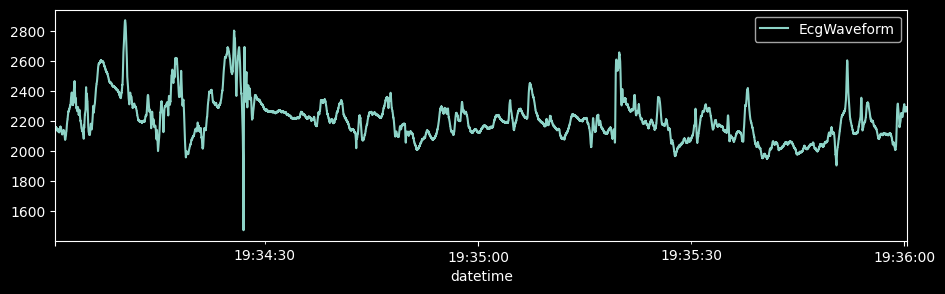

Processing file: ../data/dbt-4-csv/2014_10_01-06_55_10_ECG.csv
Original CSV file size: 290.76 MB
                         EcgWaveform
datetime                            
2014-10-01 06:55:10.447          297
2014-10-01 06:55:10.451          297
2014-10-01 06:55:10.455          297
2014-10-01 06:55:10.459          297
2014-10-01 06:55:10.463          297
Saved to feather: ../data/feathers/EcgWaveform-4-1-06_55_10-1HG.feather (63.30 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-1-06_55_10-1HG.feather


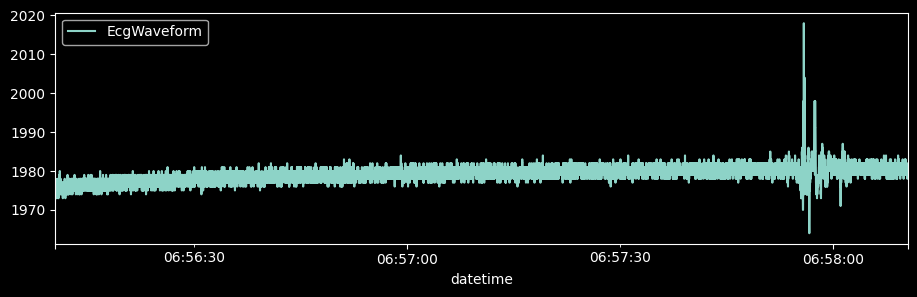

Processing file: ../data/dbt-4-csv/2014_10_03-08_05_42_ECG.csv
Original CSV file size: 199.74 MB
                         EcgWaveform
datetime                            
2014-10-03 08:05:42.448          297
2014-10-03 08:05:42.452          297
2014-10-03 08:05:42.456          297
2014-10-03 08:05:42.460          297
2014-10-03 08:05:42.464          297
Saved to feather: ../data/feathers/EcgWaveform-4-3-08_05_42-2HG.feather (45.06 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-3-08_05_42-2HG.feather


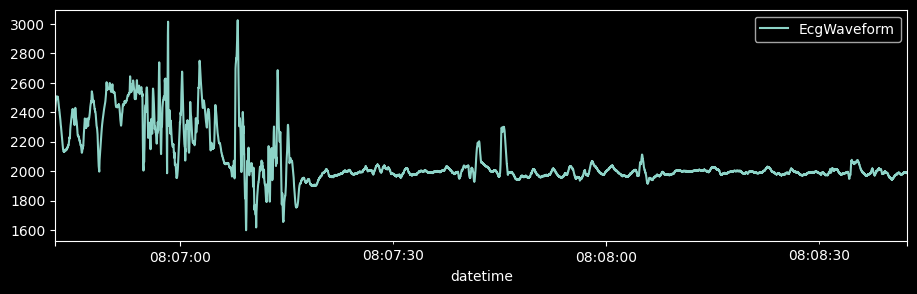

Processing file: ../data/dbt-4-csv/2014_10_04-06_32_58_ECG.csv
Original CSV file size: 255.60 MB
                         EcgWaveform
datetime                            
2014-10-04 06:32:58.408          297
2014-10-04 06:32:58.412          297
2014-10-04 06:32:58.416          297
2014-10-04 06:32:58.420          297
2014-10-04 06:32:58.424          297
Saved to feather: ../data/feathers/EcgWaveform-4-4-06_32_58-1HG.feather (57.26 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-4-06_32_58-1HG.feather


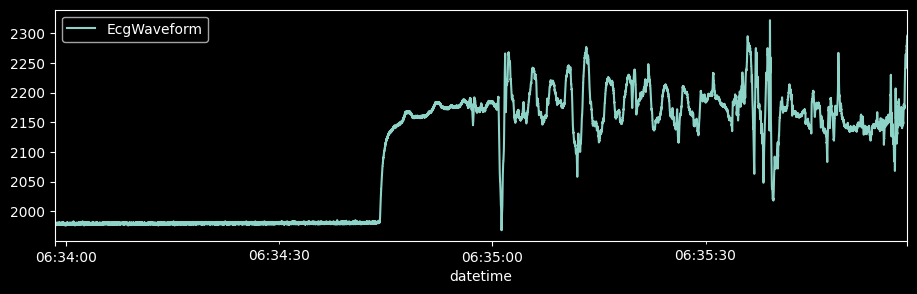

Processing file: ../data/dbt-4-csv/2014_10_04-16_49_30_ECG.csv
Original CSV file size: 23.39 MB
                         EcgWaveform
datetime                            
2014-10-04 16:49:30.409         1954
2014-10-04 16:49:30.413         1954
2014-10-04 16:49:30.417         1954
2014-10-04 16:49:30.421         1954
2014-10-04 16:49:30.425         1955
Saved to feather: ../data/feathers/EcgWaveform-4-4-16_49_30-1HG.feather (5.18 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-4-16_49_30-1HG.feather


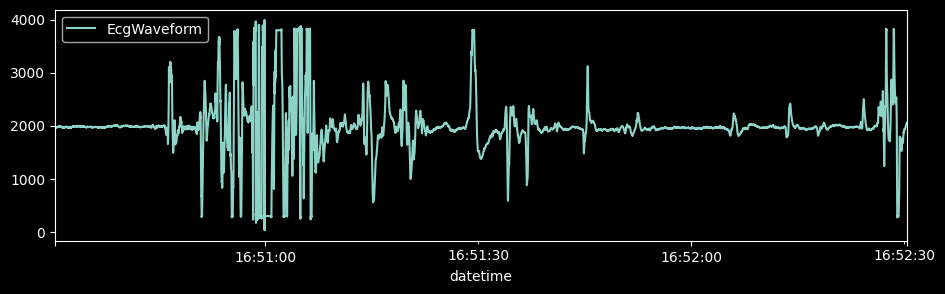

Processing file: ../data/dbt-4-csv/2014_10_02-07_21_06_ECG.csv
Original CSV file size: 306.48 MB
                         EcgWaveform
datetime                            
2014-10-02 07:21:06.447          297
2014-10-02 07:21:06.451          297
2014-10-02 07:21:06.455          297
2014-10-02 07:21:06.459          297
2014-10-02 07:21:06.463          297
Saved to feather: ../data/feathers/EcgWaveform-4-2-07_21_06-0HG.feather (69.43 MB)
Visualizing data from: ../data/feathers/EcgWaveform-4-2-07_21_06-0HG.feather


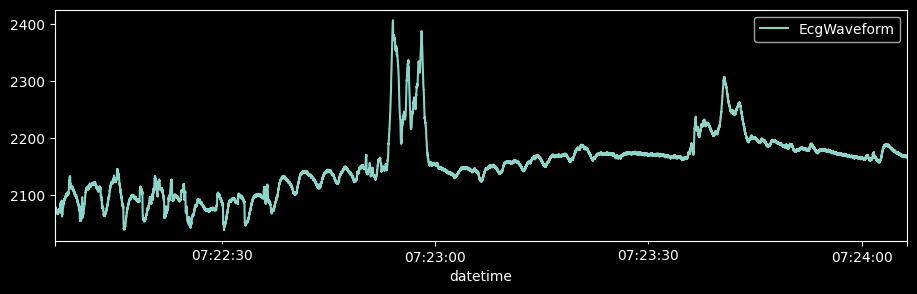

In [2]:
ID = 4


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 5

Processing file: ../data/dbt-5-csv/2014_10_03-08_42_25_ECG.csv
Original CSV file size: 349.60 MB
                         EcgWaveform
datetime                            
2014-10-03 08:42:25.429          297
2014-10-03 08:42:25.433          297
2014-10-03 08:42:25.437          297
2014-10-03 08:42:25.441          297
2014-10-03 08:42:25.445          297
Saved to feather: ../data/feathers/EcgWaveform-5-3-08_42_25-0HG.feather (78.86 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-3-08_42_25-0HG.feather


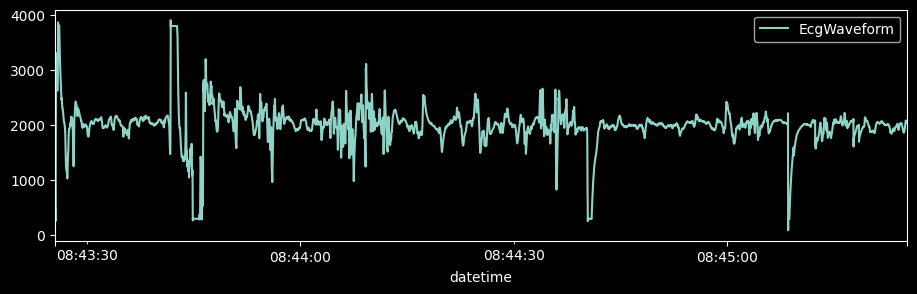

Processing file: ../data/dbt-5-csv/2014_10_02-09_23_58_ECG.csv
Original CSV file size: 56.60 MB
                         EcgWaveform
datetime                            
2014-10-02 09:23:58.429         3798
2014-10-02 09:23:58.433         3798
2014-10-02 09:23:58.437         3798
2014-10-02 09:23:58.441         3798
2014-10-02 09:23:58.445         3798
Saved to feather: ../data/feathers/EcgWaveform-5-2-09_23_58-0HG.feather (12.89 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-2-09_23_58-0HG.feather


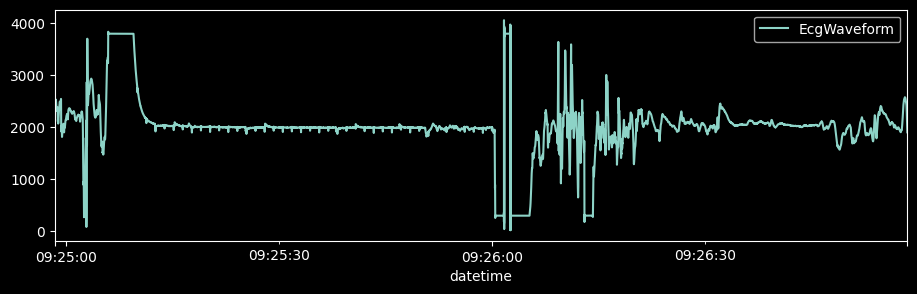

Processing file: ../data/dbt-5-csv/2014_10_01-10_40_51_ECG.csv
Original CSV file size: 292.98 MB
                         EcgWaveform
datetime                            
2014-10-01 10:40:51.428          297
2014-10-01 10:40:51.432          297
2014-10-01 10:40:51.436          297
2014-10-01 10:40:51.440          297
2014-10-01 10:40:51.444          297
Saved to feather: ../data/feathers/EcgWaveform-5-1-10_40_51-0HG.feather (68.34 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-1-10_40_51-0HG.feather


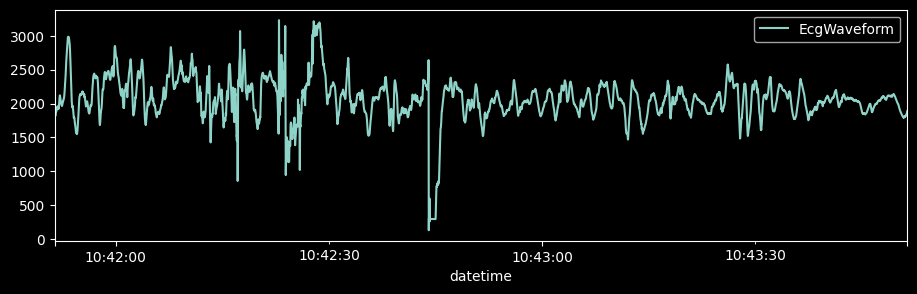

Processing file: ../data/dbt-5-csv/2014_10_02-11_40_30_ECG.csv
Original CSV file size: 282.53 MB
                         EcgWaveform
datetime                            
2014-10-02 11:40:30.429         1974
2014-10-02 11:40:30.433         1976
2014-10-02 11:40:30.437         1977
2014-10-02 11:40:30.441         1978
2014-10-02 11:40:30.445         1980
Saved to feather: ../data/feathers/EcgWaveform-5-2-11_40_30-0HG.feather (63.83 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-2-11_40_30-0HG.feather


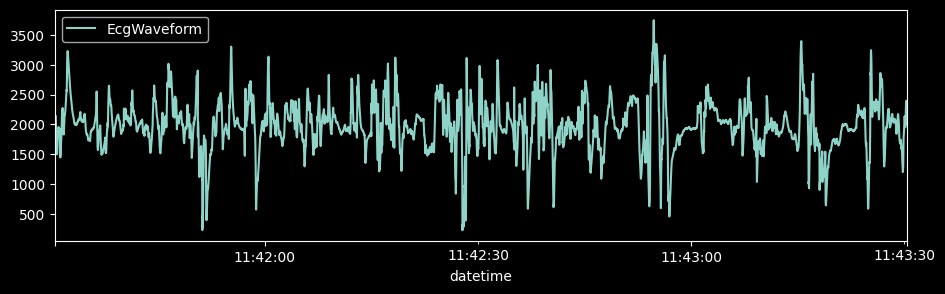

Processing file: ../data/dbt-5-csv/2014_10_01-10_27_42_ECG.csv
Original CSV file size: 0.79 MB
                         EcgWaveform
datetime                            
2014-10-01 10:27:42.426         3798
2014-10-01 10:27:42.430         3798
2014-10-01 10:27:42.434         3798
2014-10-01 10:27:42.438         3798
2014-10-01 10:27:42.442         3798
Saved to feather: ../data/feathers/EcgWaveform-5-1-10_27_42-0HG.feather (0.18 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-1-10_27_42-0HG.feather


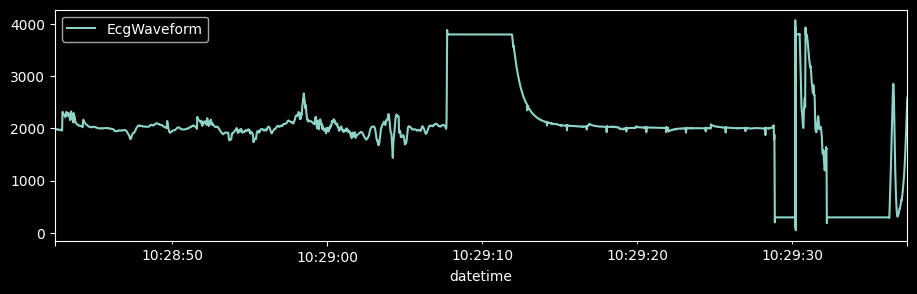

Processing file: ../data/dbt-5-csv/2014_10_04-08_02_17_ECG.csv
Original CSV file size: 182.52 MB
                         EcgWaveform
datetime                            
2014-10-04 08:02:17.431          297
2014-10-04 08:02:17.435          297
2014-10-04 08:02:17.439          297
2014-10-04 08:02:17.443          297
2014-10-04 08:02:17.447          297
Saved to feather: ../data/feathers/EcgWaveform-5-4-08_02_17-1HG.feather (40.38 MB)
Visualizing data from: ../data/feathers/EcgWaveform-5-4-08_02_17-1HG.feather


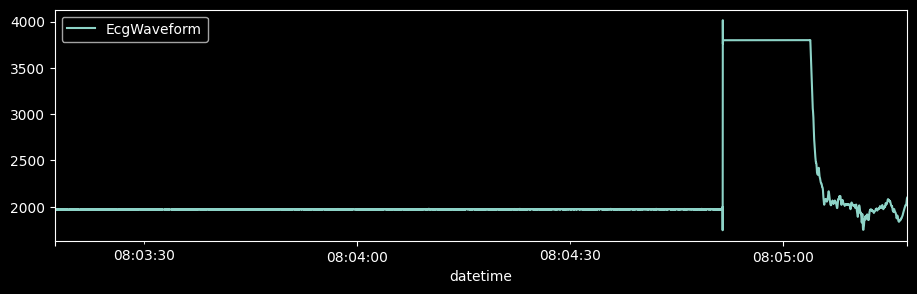

In [3]:
ID = 5


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 6

Processing file: ../data/dbt-6-csv/2014_10_01-06_46_44_ECG.csv
Original CSV file size: 207.92 MB
                         EcgWaveform
datetime                            
2014-10-01 06:46:44.409         3798
2014-10-01 06:46:44.413         3798
2014-10-01 06:46:44.417         3798
2014-10-01 06:46:44.421         3798
2014-10-01 06:46:44.425         3798
Saved to feather: ../data/feathers/EcgWaveform-6-1-06_46_44-0HG.feather (45.81 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-1-06_46_44-0HG.feather


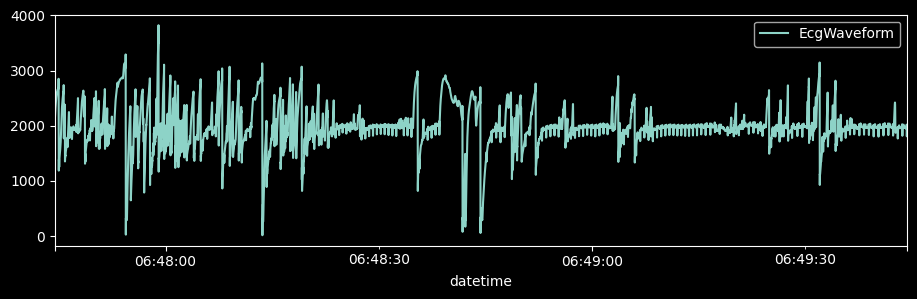

Processing file: ../data/dbt-6-csv/2014_10_04-10_30_26_ECG.csv
Original CSV file size: 284.86 MB
                         EcgWaveform
datetime                            
2014-10-04 10:30:26.417          297
2014-10-04 10:30:26.421          297
2014-10-04 10:30:26.425          297
2014-10-04 10:30:26.429          297
2014-10-04 10:30:26.433          297
Saved to feather: ../data/feathers/EcgWaveform-6-4-10_30_26-1HG.feather (61.16 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-4-10_30_26-1HG.feather


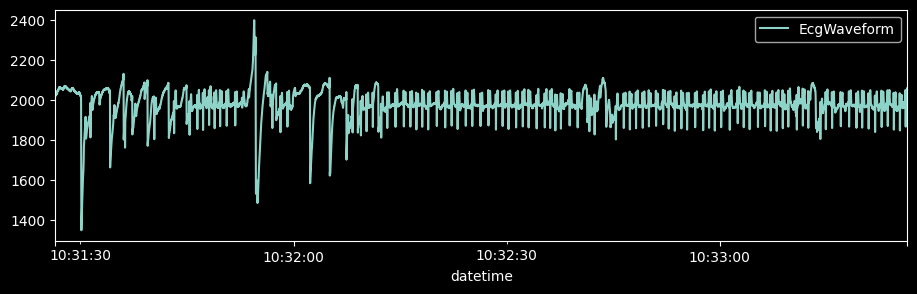

Processing file: ../data/dbt-6-csv/2014_10_01-15_08_04_ECG.csv
Original CSV file size: 275.19 MB
                         EcgWaveform
datetime                            
2014-10-01 15:08:04.410         1984
2014-10-01 15:08:04.414         1984
2014-10-01 15:08:04.418         1983
2014-10-01 15:08:04.422         1982
2014-10-01 15:08:04.426         1980
Saved to feather: ../data/feathers/EcgWaveform-6-1-15_08_04-0HG.feather (60.33 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-1-15_08_04-0HG.feather


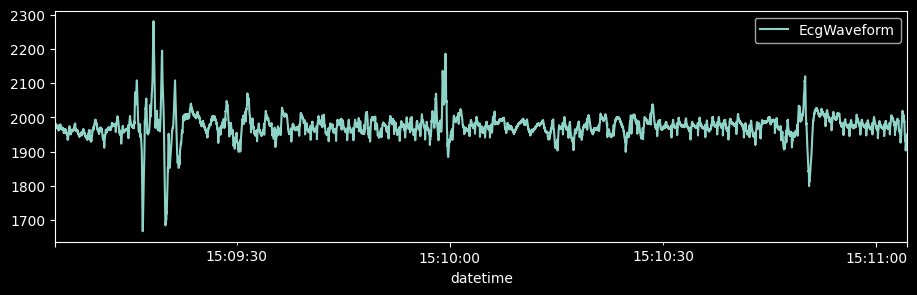

Processing file: ../data/dbt-6-csv/2014_10_03-08_57_56_ECG.csv
Original CSV file size: 347.08 MB
                         EcgWaveform
datetime                            
2014-10-03 08:57:56.416         3798
2014-10-03 08:57:56.420         3798
2014-10-03 08:57:56.424         3798
2014-10-03 08:57:56.428         3798
2014-10-03 08:57:56.432         3798
Saved to feather: ../data/feathers/EcgWaveform-6-3-08_57_56-0HG.feather (76.73 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-3-08_57_56-0HG.feather


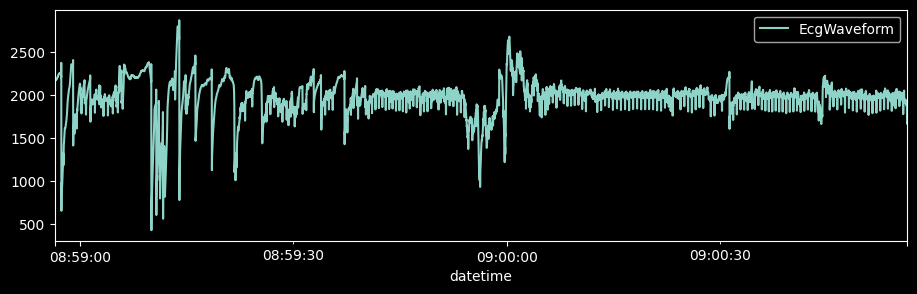

Processing file: ../data/dbt-6-csv/2014_10_02-15_13_03_ECG.csv
Original CSV file size: 158.20 MB
                         EcgWaveform
datetime                            
2014-10-02 15:13:03.415         3798
2014-10-02 15:13:03.419         3798
2014-10-02 15:13:03.423         3798
2014-10-02 15:13:03.427         3798
2014-10-02 15:13:03.431         3798
Saved to feather: ../data/feathers/EcgWaveform-6-2-15_13_03-0HG.feather (34.63 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-2-15_13_03-0HG.feather


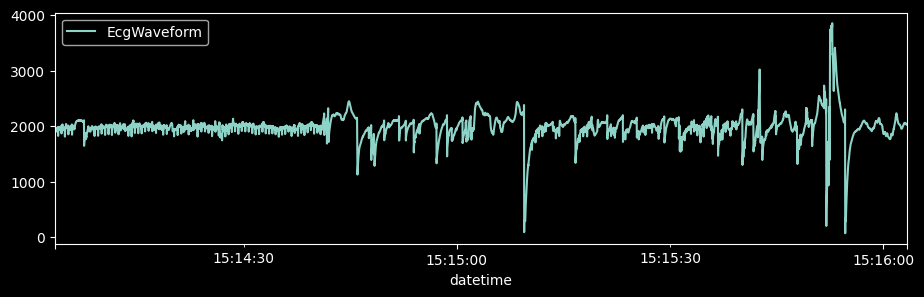

Processing file: ../data/dbt-6-csv/2014_10_02-08_03_53_ECG.csv
Original CSV file size: 118.07 MB
                         EcgWaveform
datetime                            
2014-10-02 08:03:53.411          297
2014-10-02 08:03:53.415          297
2014-10-02 08:03:53.419          297
2014-10-02 08:03:53.423          297
2014-10-02 08:03:53.427          297
Saved to feather: ../data/feathers/EcgWaveform-6-2-08_03_53-0HG.feather (26.80 MB)
Visualizing data from: ../data/feathers/EcgWaveform-6-2-08_03_53-0HG.feather


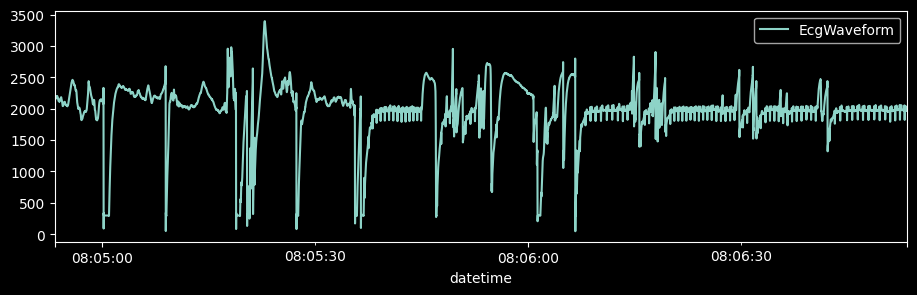

In [4]:
ID = 6


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 7

Processing file: ../data/dbt-7-csv/2014_10_04-08_27_21_ECG.csv
Original CSV file size: 340.86 MB
                         EcgWaveform
datetime                            
2014-10-04 08:27:21.440         3798
2014-10-04 08:27:21.444         3798
2014-10-04 08:27:21.448         3798
2014-10-04 08:27:21.452         3798
2014-10-04 08:27:21.456         3798
Saved to feather: ../data/feathers/EcgWaveform-7-4-08_27_21-0HG.feather (75.85 MB)
Visualizing data from: ../data/feathers/EcgWaveform-7-4-08_27_21-0HG.feather


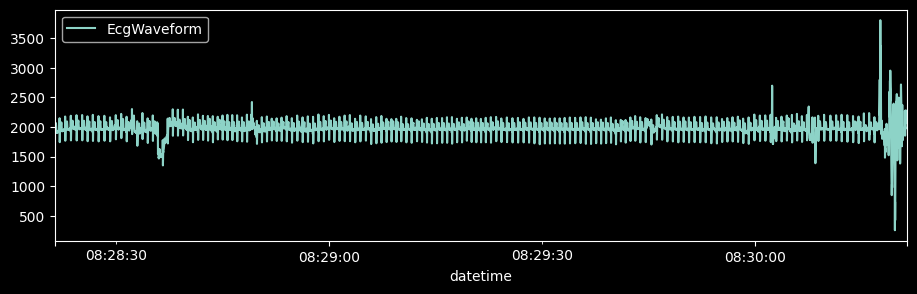

Processing file: ../data/dbt-7-csv/2014_10_01-08_42_43_ECG.csv
Original CSV file size: 374.70 MB
                         EcgWaveform
datetime                            
2014-10-01 08:42:43.435         3798
2014-10-01 08:42:43.439         3798
2014-10-01 08:42:43.443         3798
2014-10-01 08:42:43.447         3798
2014-10-01 08:42:43.451         3798
Saved to feather: ../data/feathers/EcgWaveform-7-1-08_42_43-0HG.feather (84.40 MB)
Visualizing data from: ../data/feathers/EcgWaveform-7-1-08_42_43-0HG.feather


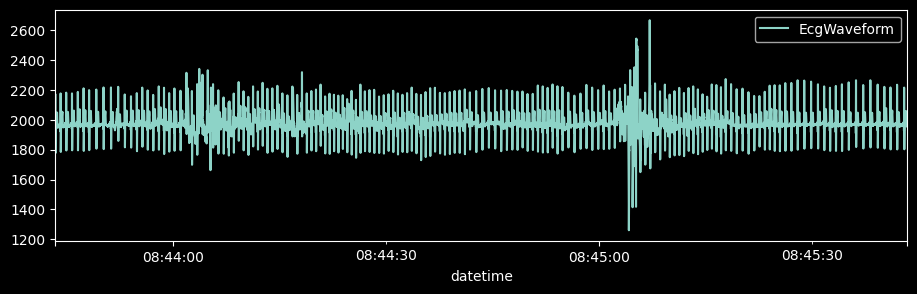

Processing file: ../data/dbt-7-csv/2014_10_02-07_52_44_ECG.csv
Original CSV file size: 270.63 MB
                         EcgWaveform
datetime                            
2014-10-02 07:52:44.437         3798
2014-10-02 07:52:44.441         3798
2014-10-02 07:52:44.445         3798
2014-10-02 07:52:44.449         3798
2014-10-02 07:52:44.453         3798
Saved to feather: ../data/feathers/EcgWaveform-7-2-07_52_44-0HG.feather (63.03 MB)
Visualizing data from: ../data/feathers/EcgWaveform-7-2-07_52_44-0HG.feather


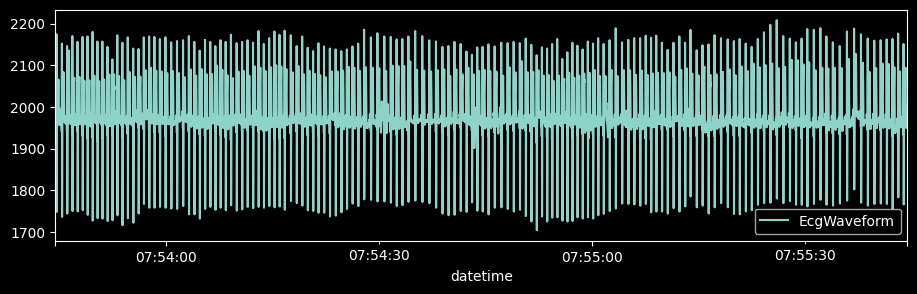

Processing file: ../data/dbt-7-csv/2014_10_03-06_46_57_ECG.csv
Original CSV file size: 495.25 MB
                         EcgWaveform
datetime                            
2014-10-03 06:46:57.440         3798
2014-10-03 06:46:57.444         3798
2014-10-03 06:46:57.448         3798
2014-10-03 06:46:57.452         3798
2014-10-03 06:46:57.456         3798
Saved to feather: ../data/feathers/EcgWaveform-7-3-06_46_57-0HG.feather (111.85 MB)
Visualizing data from: ../data/feathers/EcgWaveform-7-3-06_46_57-0HG.feather


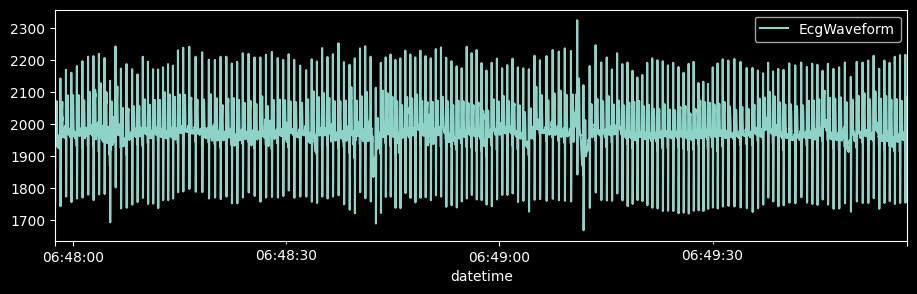

In [5]:
ID = 7


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 8

Processing file: ../data/dbt-8-csv/2014_10_01-06_43_00_ECG.csv
Original CSV file size: 382.12 MB
                         EcgWaveform
datetime                            
2014-10-01 06:43:00.423         3798
2014-10-01 06:43:00.427         3798
2014-10-01 06:43:00.431         3798
2014-10-01 06:43:00.435         3798
2014-10-01 06:43:00.439         3798
Saved to feather: ../data/feathers/EcgWaveform-8-1-06_43_00-3HG.feather (85.53 MB)
Visualizing data from: ../data/feathers/EcgWaveform-8-1-06_43_00-3HG.feather


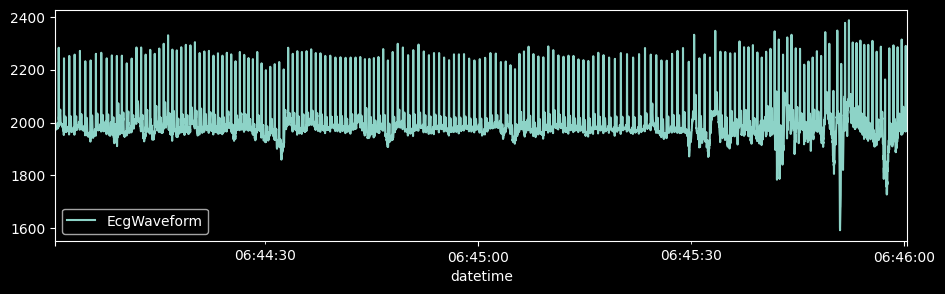

Processing file: ../data/dbt-8-csv/2014_10_03-10_51_39_ECG.csv
Original CSV file size: 300.02 MB
                         EcgWaveform
datetime                            
2014-10-03 10:51:39.428          297
2014-10-03 10:51:39.432          297
2014-10-03 10:51:39.436          297
2014-10-03 10:51:39.440          297
2014-10-03 10:51:39.444          297
Saved to feather: ../data/feathers/EcgWaveform-8-3-10_51_39-3HG.feather (64.46 MB)
Visualizing data from: ../data/feathers/EcgWaveform-8-3-10_51_39-3HG.feather


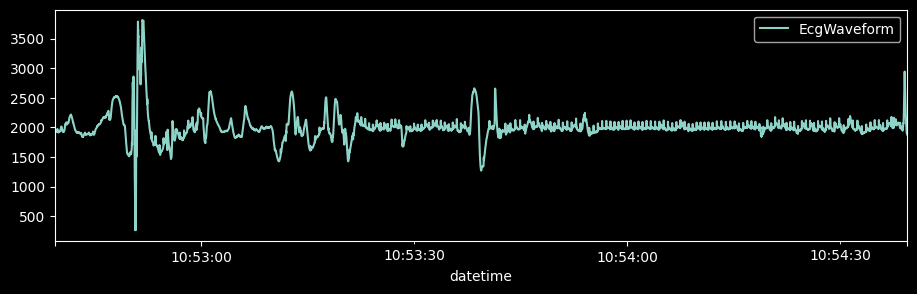

Processing file: ../data/dbt-8-csv/2014_10_03-22_54_51_ECG.csv
Original CSV file size: 228.29 MB
                         EcgWaveform
datetime                            
2014-10-03 22:54:51.428         1877
2014-10-03 22:54:51.432         1874
2014-10-03 22:54:51.436         1872
2014-10-03 22:54:51.440         1874
2014-10-03 22:54:51.444         1886
Saved to feather: ../data/feathers/EcgWaveform-8-3-22_54_51-3HG.feather (47.64 MB)
Visualizing data from: ../data/feathers/EcgWaveform-8-3-22_54_51-3HG.feather


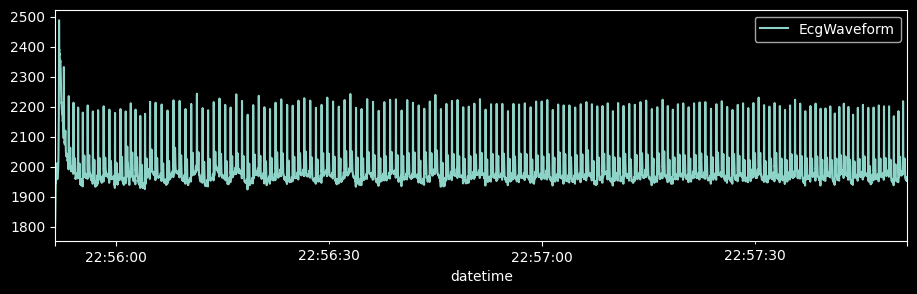

Processing file: ../data/dbt-8-csv/2014_10_02-10_13_52_ECG.csv
Original CSV file size: 428.38 MB
                         EcgWaveform
datetime                            
2014-10-02 10:13:52.425         3798
2014-10-02 10:13:52.429         3798
2014-10-02 10:13:52.433         3798
2014-10-02 10:13:52.437         3798
2014-10-02 10:13:52.441         3798
Saved to feather: ../data/feathers/EcgWaveform-8-2-10_13_52-1HG.feather (92.02 MB)
Visualizing data from: ../data/feathers/EcgWaveform-8-2-10_13_52-1HG.feather


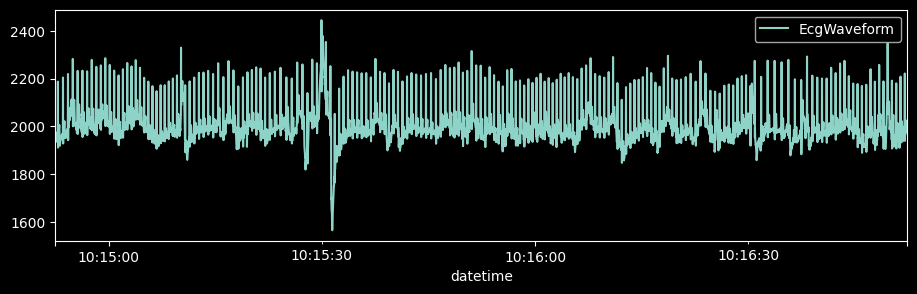

In [6]:
ID = 8


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

## Person 9 !! The last one

Processing file: ../data/dbt-9-csv/2014_10_01-05_59_30_ECG.csv
Original CSV file size: 317.10 MB
                         EcgWaveform
datetime                            
2014-10-01 05:59:30.427          297
2014-10-01 05:59:30.431          297
2014-10-01 05:59:30.435          297
2014-10-01 05:59:30.439          297
2014-10-01 05:59:30.443          297
Saved to feather: ../data/feathers/EcgWaveform-9-1-05_59_30-0HG.feather (73.59 MB)
Visualizing data from: ../data/feathers/EcgWaveform-9-1-05_59_30-0HG.feather


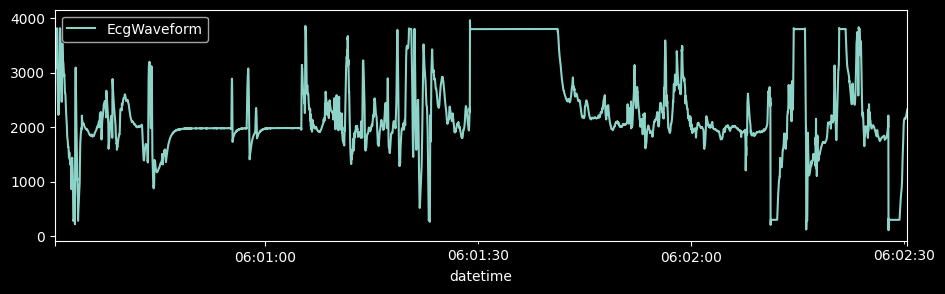

Processing file: ../data/dbt-9-csv/2014_10_02-06_14_52_ECG.csv
Original CSV file size: 357.45 MB
                         EcgWaveform
datetime                            
2014-10-02 06:14:52.428          297
2014-10-02 06:14:52.432          297
2014-10-02 06:14:52.436          297
2014-10-02 06:14:52.440          297
2014-10-02 06:14:52.444          297
Saved to feather: ../data/feathers/EcgWaveform-9-2-06_14_52-1HG.feather (82.11 MB)
Visualizing data from: ../data/feathers/EcgWaveform-9-2-06_14_52-1HG.feather


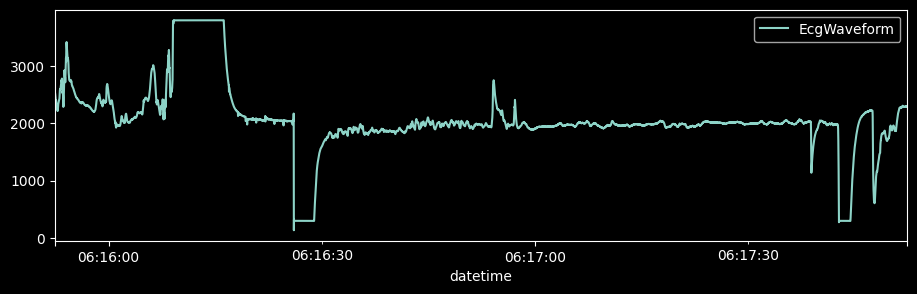

Processing file: ../data/dbt-9-csv/2014_10_03-08_21_59_ECG.csv
Original CSV file size: 292.84 MB
                         EcgWaveform
datetime                            
2014-10-03 08:21:59.428          297
2014-10-03 08:21:59.432          297
2014-10-03 08:21:59.436          297
2014-10-03 08:21:59.440          297
2014-10-03 08:21:59.444          297
Saved to feather: ../data/feathers/EcgWaveform-9-3-08_21_59-1HG.feather (66.40 MB)
Visualizing data from: ../data/feathers/EcgWaveform-9-3-08_21_59-1HG.feather


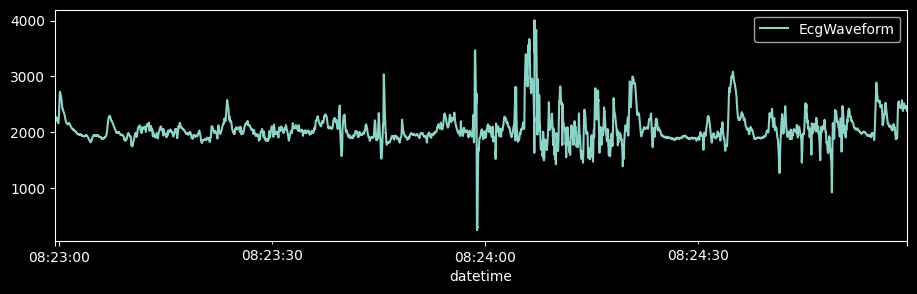

Processing file: ../data/dbt-9-csv/2014_10_04-15_03_37_ECG.csv
Original CSV file size: 191.67 MB
                         EcgWaveform
datetime                            
2014-10-04 15:03:37.428         1984
2014-10-04 15:03:37.432         1989
2014-10-04 15:03:37.436         1991
2014-10-04 15:03:37.440         1992
2014-10-04 15:03:37.444         1990
Saved to feather: ../data/feathers/EcgWaveform-9-4-15_03_37-0HG.feather (41.41 MB)
Visualizing data from: ../data/feathers/EcgWaveform-9-4-15_03_37-0HG.feather


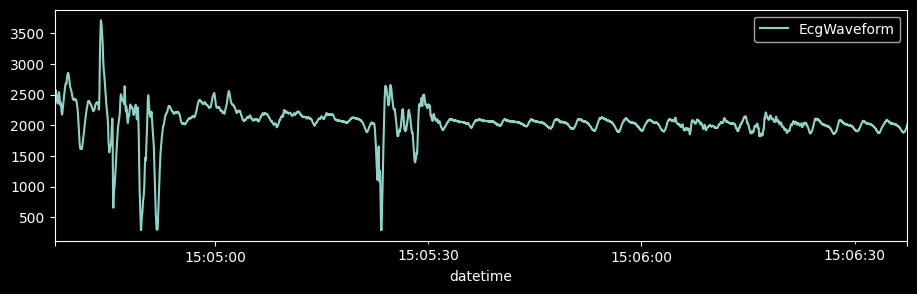

Processing file: ../data/dbt-9-csv/2014_10_04-09_09_29_ECG.csv
Original CSV file size: 146.77 MB
                         EcgWaveform
datetime                            
2014-10-04 09:09:29.429          297
2014-10-04 09:09:29.433          297
2014-10-04 09:09:29.437          297
2014-10-04 09:09:29.441          297
2014-10-04 09:09:29.445          297
Saved to feather: ../data/feathers/EcgWaveform-9-4-09_09_29-0HG.feather (32.77 MB)
Visualizing data from: ../data/feathers/EcgWaveform-9-4-09_09_29-0HG.feather


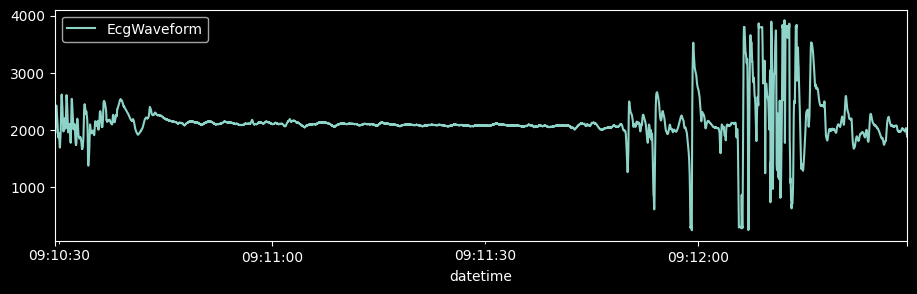

In [7]:
ID = 9


person = {'ID': ID}

person['glucose'] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID-1])
person['hg_events'] = comp.identify_hg_events(person['glucose'], min_duration=15, threshold=3.9)

person['day_count'] = comp.day_count_HG(person)


csv_paths = []
for root, dirs, files in os.walk(f'../data/dbt-{ID}-csv'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))



for file_path in csv_paths:
    # Parse and compress the CSV file
    df = comp.parse_compress_csv(file_path, signal_type=SIGNAL_TYPE)

    # get the file name
    file_name = os.path.basename(file_path).replace('.csv', '')

    day = file_name[9:10]
    HG_count = person['day_count'][day]

###########################
    # checking date correctness
    assert df.index[0].month == 10
    assert df.index[0].day == int(day)

###########################
    # Save the compressed data to feather format
    # with the name format: SIGNAL_TYPE-ID-DAY-First_Sample_Time-numHG.feather
    new_feather_path = os.path.join(RAW_DATA_DIR,
                           f"{SIGNAL_TYPE}-{ID}-{file_name[9:-4]}-{HG_count}HG.feather")

    comp.save_to_feather(df, new_feather_path)
###########################

    # Plot a segment for visual inspection
    print(f"Visualizing data from: {new_feather_path}")
    df.iloc[15000:15000*3].plot(y=SIGNAL_TYPE, figsize=(11, 3))
    plt.show()

    # Clean up memory
    del df

In [ ]:
# p3 csv to feather
p3_csv = [100.19, 402.67, 242.19, 85.22, 385.85]
p3_feather = [19.84,  89.60, 54.37, 18.75, 80.69]

# p4 csv to feather
p4_csv = [10.61, 290.76, 199.74, 255.60, 23.39, 306.48]
p4_feather = [2.27, 63.30, 45.06, 57.26, 5.18, 69.43]
# p5 csv to feather
p5_csv = [349.60, 56.60, 292.98, 282.53, 0.79, 182.52]
p5_feather = [78.86, 12.89, 68.34, 63.83, 0.18, 40.38]
# p6 csv to feather
p6_csv = [207.92, 284.86, 275.19, 347.08, 158.20, 118.07]
p6_feather = [45.81, 61.16, 60.33, 76.73, 34.63, 26.80]
# p7 csv to feather
p7_csv = [340.86, 374.70, 270.63, 495.25]
p7_feather = [75.85, 84.40, 63.03, 111.85]
# p8 csv to feather
p8_csv = [382.12, 300.02, 228.29, 428.38]
p8_feather = [85.53, 64.46, 47.64, 92.02]
# p9 csv to feather
p9_csv = [317.10, 357.45, 292.84, 191.67, 146.77]
p9_feather = [73.59, 82.11, 66.40, 41.41, 32.77]

In [ ]:
total_csv_MB = sum(p3_csv + p4_csv + p5_csv + p6_csv + p7_csv + p8_csv + p9_csv)

In [ ]:
total_feather_MB = sum(p3_feather + p4_feather + p5_feather + p6_feather + p7_feather + p8_feather + p9_feather)

In [ ]:
print(f'Total CSV size: {total_csv_MB:.2f} MB')
print(f'Total Feather size: {total_feather_MB:.2f} MB')
print(f'All feather files are {((total_feather_MB) / total_csv_MB) * 100:.2f}% of the CSV size')
print(f'So the total size is reduced {total_csv_MB / total_feather_MB :.2f} times')

Total CSV size: 8985.12 MB
Total Feather size: 1996.75 MB
All feather files are 22.22% of the CSV size
So the total size is reduced 4.50 times
